In [18]:
import pandas as pd
import glob
import os

path = './dados' 
all_files = glob.glob(path + "/*.csv")

dataframes = {}
for filename in all_files:
    name = os.path.basename(filename).replace('.csv', '')
    dataframes[name] = pd.read_csv(filename)

print(dataframes.keys()) 

if not dataframes:
    print("Erro: Nenhum arquivo CSV encontrado. Verifique o caminho da pasta!")
else:
    for nome, df in dataframes.items():
        print(f"Tabela: {nome} | Linhas: {len(df)} | Colunas: {len(df.columns)}")

dict_keys(['accessories', 'achievements', 'art', 'bags', 'bottoms', 'construction', 'dress-up', 'fencing', 'fish', 'floors', 'fossils', 'headwear', 'housewares', 'insects', 'miscellaneous', 'music', 'other', 'photos', 'posters', 'reactions', 'recipes', 'rugs', 'shoes', 'socks', 'tools', 'tops', 'umbrellas', 'villagers', 'wall-mounted', 'wallpaper'])
Tabela: accessories | Linhas: 222 | Colunas: 22
Tabela: achievements | Linhas: 84 | Colunas: 21
Tabela: art | Linhas: 70 | Colunas: 26
Tabela: bags | Linhas: 96 | Colunas: 20
Tabela: bottoms | Linhas: 726 | Colunas: 20
Tabela: construction | Linhas: 236 | Colunas: 7
Tabela: dress-up | Linhas: 913 | Colunas: 22
Tabela: fencing | Linhas: 19 | Colunas: 11
Tabela: fish | Linhas: 80 | Colunas: 41
Tabela: floors | Linhas: 176 | Colunas: 19
Tabela: fossils | Linhas: 73 | Colunas: 14
Tabela: headwear | Linhas: 698 | Colunas: 22
Tabela: housewares | Linhas: 3275 | Colunas: 32
Tabela: insects | Linhas: 80 | Colunas: 38
Tabela: miscellaneous | Linhas:

In [22]:
#analisando os peixes mais lucrativos
df_fish = dataframes['fish']

#selecionando apenas as colunas relevantes
df_lucro = df_fish[['Name', 'Sell']]

#ordenando o dataframe pelo preço de venda em ordem decrescente
df_ordenado = df_lucro.sort_values(by='Sell', ascending=False)

#imprimindo os 5 peixes mais lucrativos
print("--- TOP 5 peixes mais lucrativos ---")
print(df_ordenado.head(5))

--- TOP 5 peixes mais lucrativos ---
                 Name   Sell
5           barreleye  15000
30       golden trout  15000
23             dorado  15000
69         stringfish  15000
32  great white shark  15000


In [25]:
#analisando o valor médio de venda por categoria
#criando dataframes separados para cada categoria
df_peixes = dataframes['fish'][['Name', 'Sell']].copy()
df_insetos = dataframes['insects'][['Name', 'Sell']].copy()
df_fosseis = dataframes['fossils'][['Name', 'Sell']].copy()

#adicionando uma coluna de categoria para cada dataframe
df_peixes['Categoria'] = 'Peixe'
df_insetos['Categoria'] = 'Inseto'
df_fosseis['Categoria'] = 'Fóssil'

#concatenando todos os dataframes em um único
df_geral = pd.concat([df_peixes, df_insetos, df_fosseis])

#calculando o valor médio de venda por categoria
#imprimindo o insight
print("--- Valor médio por categoria ---")
print(df_geral.groupby('Categoria')['Sell'].mean().sort_values(ascending=False))

#identificando o item mais caro entre todas as categorias
mais_caro = df_geral.sort_values(by='Sell', ascending=False).iloc[0]
print(f"O item mais valioso é o {mais_caro['Name']} ({mais_caro['Categoria']}) custando {mais_caro['Sell']} Bells!")

--- Valor médio por categoria ---
Categoria
Peixe     3745.000000
Fóssil    3563.013699
Inseto    2220.500000
Name: Sell, dtype: float64
O item mais valioso é o barreleye (Peixe) custando 15000 Bells!


C:\Users\User\AppData\Local\Temp\ipykernel_3904\2756146206.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(


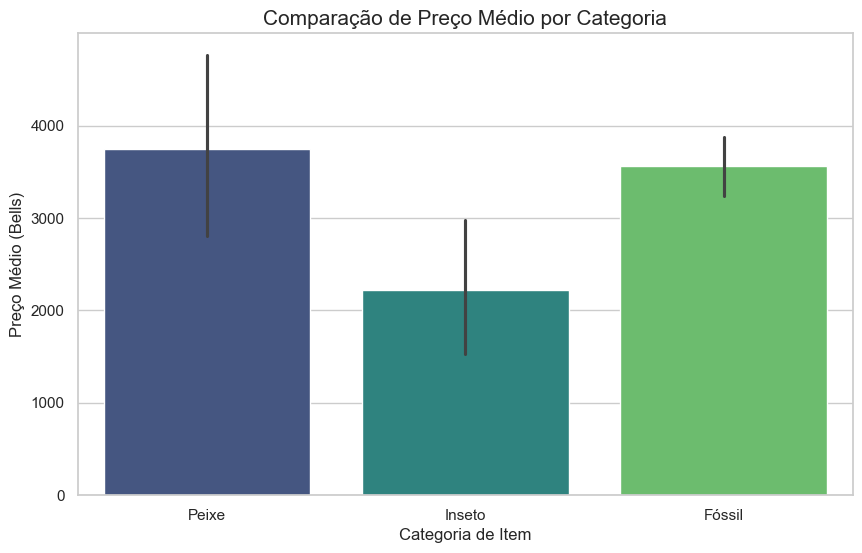

In [21]:
#visualizando os dados com um gráfico de barras
import matplotlib.pyplot as plt
#seaborn para melhorar a estética dos gráficos
import seaborn as sns

#definindo o estilo do seaborn
sns.set_theme(style="whitegrid")

#criando o gráfico de barras
plt.figure(figsize=(10, 6))
grafico = sns.barplot(
    data=df_geral, #usando o dataframe geral
    x='Categoria', 
    y='Sell', 
    estimator='mean',
    palette='viridis'
)

#adicionando títulos e rótulos
plt.title('Comparação de Preço Médio por Categoria', fontsize=15)
plt.xlabel('Categoria de Item', fontsize=12)
plt.ylabel('Preço Médio (Bells)', fontsize=12)

#salvando o gráfico como imagem
plt.savefig('grafico_precos.png')

#exibindo o gráfico
plt.show()

In [17]:
#analisando os musicas mais caras
df_music = dataframes['music']

#filtrando musicas que estão à venda
df_music_venda = df_music[df_music['Buy'] != 'NFS'].copy()

#convertendo a coluna 'Buy' para numérica
df_music_venda['Buy'] = df_music_venda['Buy'].astype(int)

#selecionando apenas as colunas relevantes
df_compra = df_music_venda[['Name', 'Buy']]

#ordenando o dataframe pelo preço de venda em ordem decrescente
df_ordenado = df_compra.sort_values(by='Buy', ascending=False)

#imprimindo os 5 musicas mais caras
print("---TOP 5 musicas mais caras---")
print(df_ordenado.head(5))

---TOP 5 musicas mais caras---
             Name   Buy
0      Agent K.K.  3200
1      Aloha K.K.  3200
3  Bubblegum K.K.  3200
4       Café K.K.  3200
5    Comrade K.K.  3200
